In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("cc1/airline_satisfaction.csv")
df.drop('Unnamed: 0', inplace = True, axis=1)
df =df.dropna()
df= df.reset_index()

In [2]:
ordinal = ["Departure/Arrival time convenient","Ease of Online booking","Gate location",
           "Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
           "Baggage handling","Checkin service","Inflight service","Cleanliness"]
df["Note_totale"]=df["Inflight wifi service"]
print(len(ordinal))
for i in ordinal:
    df["Note_totale"]+=df[i]

13


In [3]:
ordinal += ["Inflight wifi service"]
target=["satisfaction"]
quantitative =["Age","Flight Distance","Note_totale","Arrival Delay in Minutes","Departure Delay in Minutes"]#"Arrival Delay in Minutes","Departure Delay in Minutes"
ordinal+=["Class"]
qualitative=["Gender","Customer Type","Type of Travel"]
features=quantitative+qualitative+ordinal

In [4]:
X_qualitative = df[qualitative].values
X_ordinal = df[ordinal].values
X_quantitative = df[quantitative].values

y=df[target].values

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

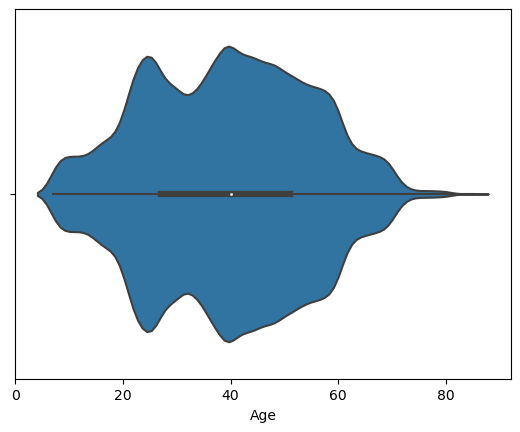

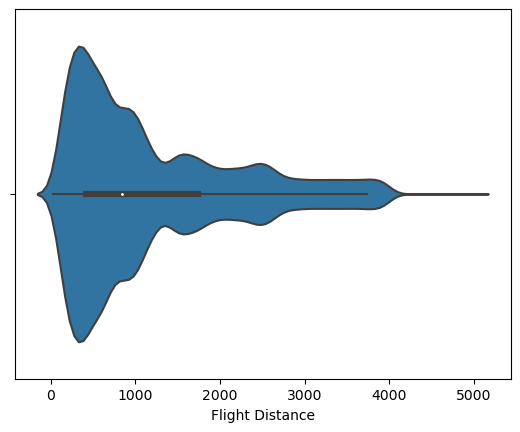

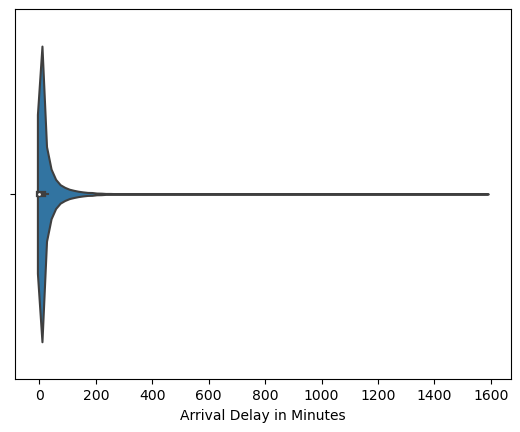

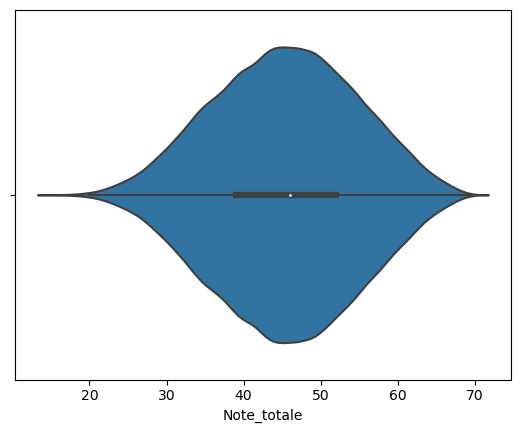

In [6]:
for i in quantitative:
    sns.violinplot(data=df, x=i)
    plt.show()

In [16]:
df[quantitative].corr()

,Age,Flight Distance,Arrival Delay in Minutes,Departure Delay in Minutes,Note_totale
Age,1.000000,0.099863,-0.011248,-0.009263,0.091359
Flight Distance,0.099863,1.000000,-0.001935,0.001992,0.163184
Arrival Delay in Minutes,-0.011248,-0.001935,1.000000,0.965291,-0.036696
Departure Delay in Minutes,-0.009263,0.001992,0.965291,1.000000,-0.031345
Note_totale,0.091359,0.163184,-0.036696,-0.031345,1.000000


In [10]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_quantitative,y)
predict_quantitative=gaussian_nb.predict(X_quantitative)
print(classification_report(y,predict_quantitative))

C:\Users\33750\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                         precision    recall  f1-score   support

neutral or dissatisfied       0.77      0.80      0.79     73225
              satisfied       0.73      0.70      0.71     56262

               accuracy                           0.75    129487
              macro avg       0.75      0.75      0.75    129487
           weighted avg       0.75      0.75      0.75    129487



sans les 2:
       precision    recall  f1-score   support

neutral or dissatisfied       0.76      0.83      0.80     73225
              satisfied       0.75      0.66      0.70     56262

               accuracy                           0.76    129487
              macro avg       0.76      0.75      0.75    129487
           weighted avg       0.76      0.76      0.76    129487


In [6]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()
y_encoded = pd.DataFrame(label_encoder.fit_transform(y))

C:\Users\33750\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
#one_hot_encoder.fit(X_qualitative)
one_hot_encoded_X = one_hot_encoder.fit_transform(X_qualitative)
one_hot_encoded_X.toarray()
one_hot_encoder.get_feature_names_out()
X_encoded = np.concatenate([one_hot_encoded_X.toarray(),X_qualitative], axis =1)

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_vars = []
for categorical_var in X_ordinal.T:
    encoded_vars.append(label_encoder.fit_transform(categorical_var))
X_ordinal = np.array(encoded_vars).T

In [11]:
X_encoded = pd.concat([pd.DataFrame(one_hot_encoded_X.toarray()),pd.DataFrame(X_ordinal)],axis=1)

In [12]:
X_encoded.head()

,0,1,2,3,4,5,0,1,2,3,...,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,1.0,0.0,0.0,1.0,4,3,1,5,...,5,5,4,3,3,4,5,5,3,2
1,0.0,1.0,0.0,1.0,1.0,0.0,2,3,3,1,...,1,1,1,5,2,1,4,1,3,0
2,1.0,0.0,1.0,0.0,1.0,0.0,2,2,2,5,...,5,5,4,3,3,4,4,5,2,0
3,1.0,0.0,1.0,0.0,1.0,0.0,5,5,5,2,...,2,2,2,5,2,1,4,2,2,0
4,0.0,1.0,1.0,0.0,1.0,0.0,3,3,3,4,...,5,3,3,4,3,3,3,3,3,0


In [13]:
gaussianNb_categorical = CategoricalNB()
gaussianNb_categorical.fit(X_encoded,y)
predict_qualitative=gaussianNb_categorical.predict(X_encoded)
print(classification_report(predict_qualitative,y))

C:\Users\33750\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                         precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.91      0.91     73602
              satisfied       0.88      0.89      0.89     55885

               accuracy                           0.90    129487
              macro avg       0.90      0.90      0.90    129487
           weighted avg       0.90      0.90      0.90    129487



In [14]:
df1 = pd.DataFrame(gaussian_nb.predict_proba(X_quantitative))
df2 = pd.DataFrame(gaussianNb_categorical.predict_proba(X_encoded))
df3 = pd.DataFrame(np.concatenate([df1,df2],axis=1))

In [15]:
df3.head()

,0,1,2,3
0,0.660861,0.339139,0.977100,0.022900
1,0.941218,0.058782,0.999943,0.000057
2,0.431911,0.568089,0.001699,0.998301
3,0.814135,0.185865,0.969559,0.030441
4,0.510344,0.489656,0.053092,0.946908


In [16]:
gaussian_final=GaussianNB()
X_fin=df3.values
gaussian_final.fit(X_fin,y)
predict_final=gaussian_final.predict(X_fin)
print(classification_report(predict_final,y))

C:\Users\33750\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.91      0.91     73141
              satisfied       0.88      0.88      0.88     56346

               accuracy                           0.90    129487
              macro avg       0.90      0.90      0.90    129487
           weighted avg       0.90      0.90      0.90    129487



In [17]:
from sklearn.model_selection import cross_val_score
cross_val_NB_precision=cross_val_score(estimator=gaussian_final,X=X_fin,y=y,cv=5,scoring="precision_macro")
cross_val_NB_recall=cross_val_score(estimator=gaussian_final,X=X_fin,y=y,cv=5,scoring="recall_macro")
cross_val_NB_accuracy=cross_val_score(estimator=gaussian_final,X=X_fin,y=y,cv=5,scoring="accuracy")

C:\Users\33750\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [116]:
cross_val_NB_recall

array([0.89682066, 0.89565478, 0.8974548 , 0.90143024, 0.89561002])

In [113]:
cross_val_NB_precision

array([0.89741358, 0.8952856 , 0.89783672, 0.9010475 , 0.89476771])

In [114]:
cross_val_NB_accuracy

array([0.89894973, 0.89721214, 0.89944781, 0.9028845 , 0.89686064])